## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.987496  1164.937961  0.704261  2.475761  1.521956
1  99.245085   851.871639  0.812606  9.620471  1.402647
2   5.355618  1282.786113  0.531777  8.432360  1.525215
3  28.104779  1201.621787  0.366541  8.795483  1.457964
4  18.974935  1470.461138  0.406360  2.536483  1.678182


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9850260	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9778641	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9666834	total: 58.8ms	remaining: 19.6s
3:	learn: 0.9589179	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9470211	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9384393	total: 60.2ms	remaining: 9.98s
6:	learn: 0.9308708	total: 60.8ms	remaining: 8.62s
7:	learn: 0.9184917	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9095294	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8982946	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8878144	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8776693	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8696436	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8607619	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8502076	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8422820	total: 65.1ms	remaining: 4s
16:	learn: 0.8303977	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8230248	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8148242	total: 66.6ms	remaining: 3.4

128:	learn: 0.3075249	total: 115ms	remaining: 778ms
129:	learn: 0.3049007	total: 116ms	remaining: 775ms
130:	learn: 0.3028840	total: 116ms	remaining: 772ms
131:	learn: 0.3006672	total: 117ms	remaining: 768ms
132:	learn: 0.2984524	total: 117ms	remaining: 763ms
133:	learn: 0.2963692	total: 117ms	remaining: 759ms
134:	learn: 0.2945867	total: 118ms	remaining: 756ms
135:	learn: 0.2928725	total: 118ms	remaining: 752ms
136:	learn: 0.2909496	total: 119ms	remaining: 748ms
137:	learn: 0.2889668	total: 119ms	remaining: 744ms
138:	learn: 0.2874159	total: 120ms	remaining: 741ms
139:	learn: 0.2851854	total: 120ms	remaining: 736ms
140:	learn: 0.2827970	total: 120ms	remaining: 732ms
141:	learn: 0.2810289	total: 121ms	remaining: 729ms
142:	learn: 0.2793913	total: 121ms	remaining: 726ms
143:	learn: 0.2774878	total: 122ms	remaining: 722ms
144:	learn: 0.2755552	total: 122ms	remaining: 719ms
145:	learn: 0.2738566	total: 122ms	remaining: 716ms
146:	learn: 0.2723133	total: 123ms	remaining: 713ms
147:	learn: 

293:	learn: 0.1323754	total: 185ms	remaining: 445ms
294:	learn: 0.1319537	total: 186ms	remaining: 444ms
295:	learn: 0.1314797	total: 186ms	remaining: 443ms
296:	learn: 0.1309907	total: 187ms	remaining: 442ms
297:	learn: 0.1305039	total: 187ms	remaining: 441ms
298:	learn: 0.1302459	total: 188ms	remaining: 440ms
299:	learn: 0.1299418	total: 188ms	remaining: 439ms
300:	learn: 0.1293012	total: 189ms	remaining: 438ms
301:	learn: 0.1289603	total: 189ms	remaining: 437ms
302:	learn: 0.1286691	total: 189ms	remaining: 436ms
303:	learn: 0.1283838	total: 190ms	remaining: 435ms
304:	learn: 0.1280229	total: 190ms	remaining: 434ms
305:	learn: 0.1277115	total: 191ms	remaining: 433ms
306:	learn: 0.1271279	total: 191ms	remaining: 432ms
307:	learn: 0.1267506	total: 192ms	remaining: 430ms
308:	learn: 0.1263910	total: 192ms	remaining: 429ms
309:	learn: 0.1259326	total: 192ms	remaining: 428ms
310:	learn: 0.1254423	total: 193ms	remaining: 427ms
311:	learn: 0.1251548	total: 193ms	remaining: 426ms
312:	learn: 

551:	learn: 0.0667703	total: 296ms	remaining: 240ms
552:	learn: 0.0666866	total: 297ms	remaining: 240ms
553:	learn: 0.0665695	total: 297ms	remaining: 239ms
554:	learn: 0.0662064	total: 298ms	remaining: 239ms
555:	learn: 0.0661244	total: 298ms	remaining: 238ms
556:	learn: 0.0660437	total: 298ms	remaining: 237ms
557:	learn: 0.0659389	total: 299ms	remaining: 237ms
558:	learn: 0.0658254	total: 299ms	remaining: 236ms
559:	learn: 0.0654711	total: 300ms	remaining: 235ms
560:	learn: 0.0653926	total: 300ms	remaining: 235ms
561:	learn: 0.0653152	total: 300ms	remaining: 234ms
562:	learn: 0.0652392	total: 301ms	remaining: 234ms
563:	learn: 0.0651643	total: 302ms	remaining: 233ms
564:	learn: 0.0648537	total: 302ms	remaining: 232ms
565:	learn: 0.0647802	total: 302ms	remaining: 232ms
566:	learn: 0.0647079	total: 303ms	remaining: 231ms
567:	learn: 0.0644706	total: 303ms	remaining: 231ms
568:	learn: 0.0642529	total: 304ms	remaining: 230ms
569:	learn: 0.0639542	total: 304ms	remaining: 230ms
570:	learn: 

709:	learn: 0.0499895	total: 367ms	remaining: 150ms
710:	learn: 0.0498888	total: 367ms	remaining: 149ms
711:	learn: 0.0496898	total: 367ms	remaining: 149ms
712:	learn: 0.0496577	total: 368ms	remaining: 148ms
713:	learn: 0.0494938	total: 368ms	remaining: 148ms
714:	learn: 0.0493945	total: 369ms	remaining: 147ms
715:	learn: 0.0493430	total: 369ms	remaining: 146ms
716:	learn: 0.0491827	total: 370ms	remaining: 146ms
717:	learn: 0.0490851	total: 370ms	remaining: 145ms
718:	learn: 0.0489403	total: 370ms	remaining: 145ms
719:	learn: 0.0489108	total: 371ms	remaining: 144ms
720:	learn: 0.0488304	total: 371ms	remaining: 144ms
721:	learn: 0.0486751	total: 371ms	remaining: 143ms
722:	learn: 0.0485061	total: 372ms	remaining: 142ms
723:	learn: 0.0484102	total: 372ms	remaining: 142ms
724:	learn: 0.0482190	total: 373ms	remaining: 141ms
725:	learn: 0.0481363	total: 373ms	remaining: 141ms
726:	learn: 0.0480419	total: 373ms	remaining: 140ms
727:	learn: 0.0478903	total: 374ms	remaining: 140ms
728:	learn: 

964:	learn: 0.0327101	total: 478ms	remaining: 17.4ms
965:	learn: 0.0326608	total: 479ms	remaining: 16.9ms
966:	learn: 0.0326050	total: 480ms	remaining: 16.4ms
967:	learn: 0.0325608	total: 480ms	remaining: 15.9ms
968:	learn: 0.0324475	total: 480ms	remaining: 15.4ms
969:	learn: 0.0324317	total: 481ms	remaining: 14.9ms
970:	learn: 0.0324173	total: 481ms	remaining: 14.4ms
971:	learn: 0.0323856	total: 482ms	remaining: 13.9ms
972:	learn: 0.0323543	total: 482ms	remaining: 13.4ms
973:	learn: 0.0323106	total: 482ms	remaining: 12.9ms
974:	learn: 0.0322952	total: 483ms	remaining: 12.4ms
975:	learn: 0.0322075	total: 483ms	remaining: 11.9ms
976:	learn: 0.0320978	total: 484ms	remaining: 11.4ms
977:	learn: 0.0319902	total: 484ms	remaining: 10.9ms
978:	learn: 0.0319417	total: 485ms	remaining: 10.4ms
979:	learn: 0.0319111	total: 485ms	remaining: 9.9ms
980:	learn: 0.0319056	total: 485ms	remaining: 9.4ms
981:	learn: 0.0319001	total: 486ms	remaining: 8.9ms
982:	learn: 0.0317946	total: 486ms	remaining: 8.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


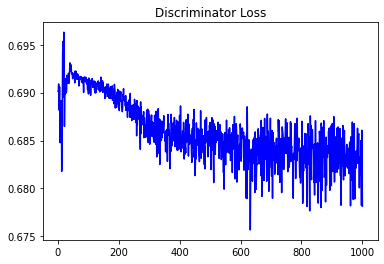

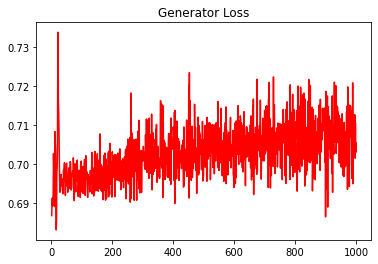

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20240740156825962


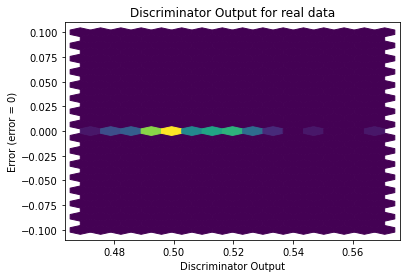

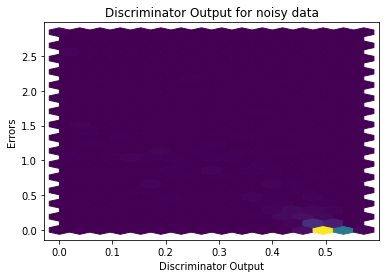

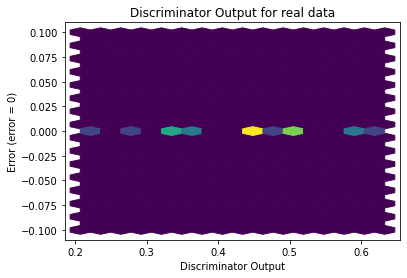

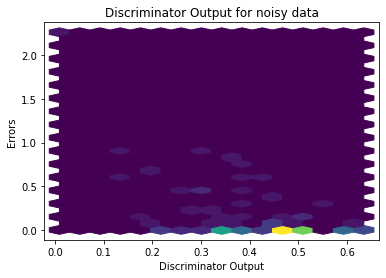

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8007]], requires_grad=True)
